# Germany’s CO₂ Emmisions and Nuclear Energy

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Data Loading

To begin the project, we explored available databases related to pollution and CO2 emissions. After gathering the data from online sources, we organized it into appropriate folders and integrated it into our code.

In [2]:
data_root = './data/'

In [3]:
# Reading the data
co2_df = pd.read_csv(f'{data_root}co2_emmisions_complicated.csv')
co2_df

,Region,Country_code,Name,Substance,1970,1971,1972,1973,1974,1975,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Rest Central America,ABW,Aruba,CO2,25.213789,28.827752,39.472108,44.289439,43.469148,57.396273,...,440.689215,462.025593,484.888607,466.591612,465.881209,557.917266,452.553064,500.635247,502.693255,530.026098
1,India +,AFG,Afghanistan,CO2,1733.920270,1733.709906,1693.584478,1733.904787,2190.318066,2028.966850,...,7825.740854,8346.520776,7527.593714,8066.138489,7932.004694,7249.068567,7054.132973,7930.781033,8259.915260,8707.349830
2,Southern_Africa,AGO,Angola,CO2,8933.899038,8519.512895,10366.104270,11346.995660,11806.560820,10904.652960,...,30887.263660,33097.498920,31285.802720,27942.098860,26258.886520,27573.216010,20710.917670,25262.831790,27353.038120,28229.927610
3,Rest Central America,AIA,Anguilla,CO2,2.177587,2.177689,2.273190,2.118480,2.359836,2.593654,...,27.917050,28.026636,28.362580,29.086622,28.247295,27.604422,22.803655,22.017827,21.861340,22.955546
4,Int. Aviation,AIR,Int. Aviation,CO2,169900.398500,169900.398500,179759.531100,187494.406300,180478.129000,174582.470500,...,507505.760800,536213.680500,560173.838900,589919.315300,615937.542300,625141.435300,298655.677600,331317.424700,411474.866100,491632.307600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,Oceania,WSM,Samoa,CO2,65.899774,65.905375,70.265568,84.517821,103.708365,85.667289,...,286.449608,328.727513,354.054879,361.318627,358.360297,402.588580,409.212075,429.106904,452.935358,468.448040
221,Middle_East,YEM,Yemen,CO2,1627.518111,1640.702831,1925.013117,2342.273430,2331.021472,2232.294382,...,28354.168110,14250.833500,10628.764410,10392.182210,12154.299510,12464.619920,11503.928360,11548.302420,11190.608460,10898.838960
222,Southern_Africa,ZAF,South Africa,CO2,185572.548600,184469.131500,191106.029500,208269.429600,215011.076200,230932.666400,...,484048.241700,460051.451900,460496.227200,469811.499100,473699.770300,478588.373100,418773.238900,428533.165300,409407.424600,397372.958100
223,Southern_Africa,ZMB,Zambia,CO2,3700.015775,3857.058714,4265.341210,4569.402729,4613.917130,4778.662920,...,5009.751407,5319.987771,5803.027583,7077.198888,8056.239782,7026.690461,7477.243028,7764.645845,7806.998322,8058.979391


Taking the data for Germany and reshaping it to for easier analysis.

In [4]:
germany_df = co2_df[co2_df['Name'] == 'Germany']
germany_df

,Region,Country_code,Name,Substance,1970,1971,1972,1973,1974,1975,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
51,OECD_Europe,DEU,Germany,CO2,1084657.531,1077419.205,1105290.332,1157720.284,1122506.646,1060566.106,...,779223.1199,785387.1812,789713.7865,774948.1794,747214.4765,697008.4883,642552.0468,677803.873,659501.8471,582950.5817


Transforms the DataFrame from wide to long format—so each row now shows a single year and its corresponding value for each year.

In [5]:
# Identifying year columns (1970–2023)
year_columns = [col for col in germany_df.columns if col.isdigit()]

germany_long = germany_df.melt(
    id_vars=['Name'],
    value_vars=year_columns,
    var_name='year',
    value_name='value'
)

germany_long['year'] = germany_long['year'].astype(int)
germany_long.head()

,Name,year,value
0,Germany,1970,1084657.531
1,Germany,1971,1077419.205
2,Germany,1972,1105290.332
3,Germany,1973,1157720.284
4,Germany,1974,1122506.646


#### When did Germany start phasing out nuclear energy?

Germany’s nuclear phase-out officially began with a policy agreement in 2000, and was significantly accelerated after the Fukushima disaster in 2011.

**2000:** The German government signed an agreement with utility companies to gradually shut down all nuclear power plants by around 2022.

**2011**: After the Fukushima nuclear disaster in Japan, Chancellor Angela Merkel’s government decided to *immediately* shut down **8 of the 17** reactors and confirmed that the remaining would be closed by 2022.

**April 2023**: Germany officially completed its phase-out by shutting down the last three remaining nuclear power plants.

In [6]:
#Filter to years 2006–2020
germany_filtered = germany_long[(germany_long['year'] >= 2006) & (germany_long['year'] <= 2020)]

# Preview result
germany_filtered

,Name,year,value
36,Germany,2006,855855.4528
37,Germany,2007,826992.6186
38,Germany,2008,830355.0777
39,Germany,2009,768553.0635
40,Germany,2010,815378.3880
41,Germany,2011,788547.7043
42,Germany,2012,800464.7518
43,Germany,2013,818278.3726
44,Germany,2014,779223.1199
45,Germany,2015,785387.1812


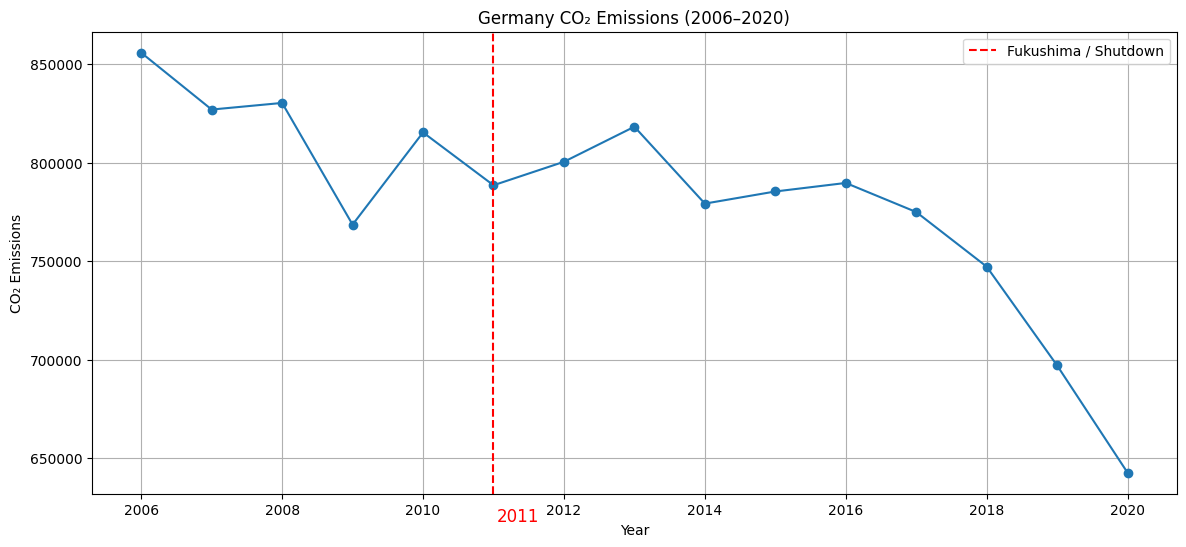

In [7]:
plt.figure(figsize=(14, 6))
plt.plot(germany_filtered['year'], germany_filtered['value'], marker='o')
plt.axvline(x=2011, color='red', linestyle='--', label='Fukushima / Shutdown')
plt.text(2011 + 0.05,
         germany_filtered['value'].max() * 0.730,
         '2011', 
         color='red', 
         fontsize=12, 
         verticalalignment='top')
plt.title('Germany CO₂ Emissions (2006–2020)')
plt.xlabel('Year')
plt.ylabel('CO₂ Emissions')
plt.legend()
plt.grid(True)
plt.show()

The decision to phase out nuclear energy in Germany in 2011, appears to have contributed to a rise in CO₂ emissions in the short term. As nuclear power plants—which produce electricity without direct carbon emissions—were gradually shut down, Germany had to compensate for the lost energy capacity. 

This gap was largely filled by increasing the use of fossil fuels, particularly coal and natural gas, both of which emit significant amounts of carbon dioxide during combustion. As a result, instead of immediately transitioning to cleaner energy sources like wind or solar, the country experienced a temporary setback in its climate goals, with overall greenhouse gas emissions rising as fossil fuel dependency increased. This highlights the complexity of energy transitions and the environmental trade-offs that can occur when reliable low-carbon sources like nuclear are removed before renewables are fully capable of meeting national energy demands.

In [9]:
# Load the CO₂ emissions dataset by sector
es_df = pd.read_csv(f'{data_root}co2_emmisions_by_sector.csv')
germany_es = es_df[es_df['Name']=='Germany']

# Sectors we are interested in analyzing
selected_sectors = [
    'Public electricity and heat production',
    'Other Energy Industries',
    'Manufacturing Industries and Construction'
]

germany_es = germany_es[germany_es['Sector'].isin(selected_sectors)]
germany_es= germany_es.head(3)

#Preview result
germany_es

,Region,Country_code,Name,Sector,Substance,1970,1971,1972,1973,1974,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
985,OECD_Europe,DEU,Germany,Public electricity and heat production,CO2,322597.10600,337991.24060,352798.24540,368825.11810,376011.70420,...,327324.33650,322596.21560,321808.59190,303887.31780,287113.61850,239062.43990,203956.30650,233586.42900,229639.50590,177563.78760
986,OECD_Europe,DEU,Germany,Other Energy Industries,CO2,48800.85262,47633.09599,46426.67303,45857.65543,45416.78607,...,22923.68047,23652.83212,24129.18201,23843.40255,23272.74443,22787.14107,22044.78549,21208.24189,22111.00053,19348.08517
987,OECD_Europe,DEU,Germany,Manufacturing Industries and Construction,CO2,252868.72550,241754.43900,242740.49050,261015.60310,256640.39930,...,91246.19671,95118.87869,93219.37838,95138.81140,98339.92528,93430.42569,93357.66125,92640.59223,85655.74084,78283.31532


In [10]:
# Convert year columns from wide to long format
es_long = germany_es.melt(
    id_vars=['Region', 'Country_code', 'Name', 'Sector', 'Substance'],
    var_name='year',
    value_name='value'
)

# Convert 'year' to int
es_long['year'] = es_long['year'].astype(int)

In [11]:
filtered = es_long[
    (es_long['Sector'].isin(selected_sectors))]

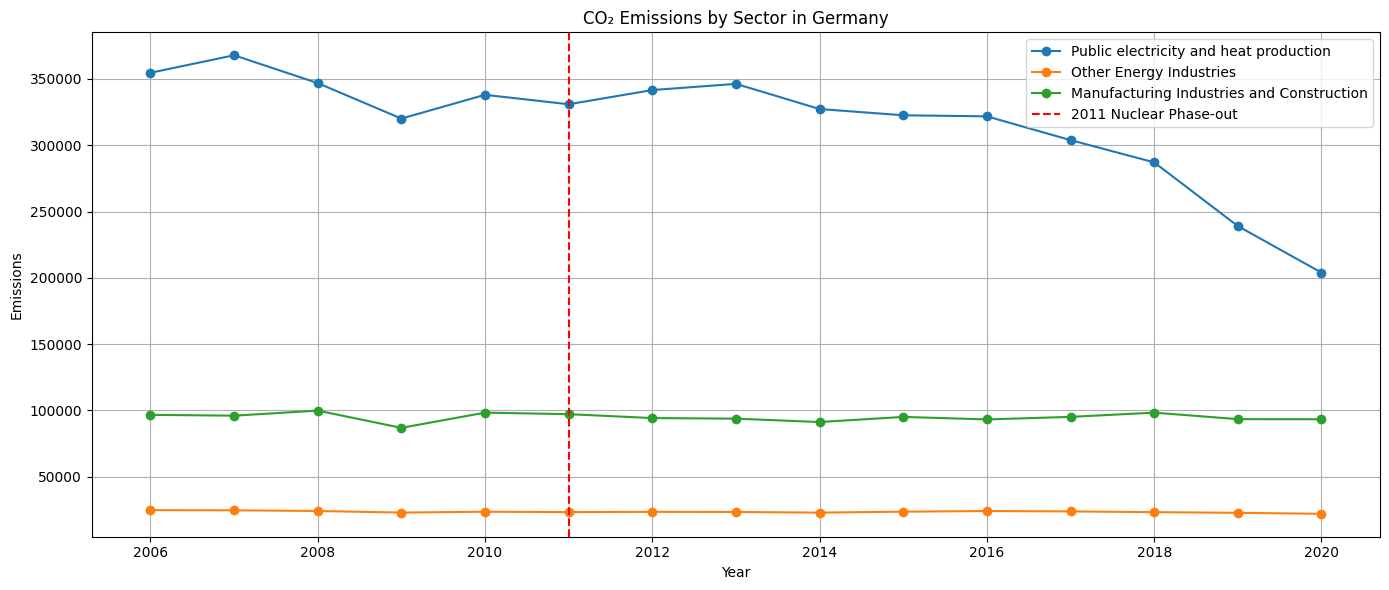

In [12]:
plt.figure(figsize=(14, 6))

# Plot each sector with a different line
for sector in selected_sectors:
    sector_data = filtered[filtered['Sector'] == sector]
    sector_data = sector_data[(sector_data['year'] >= 2006) & (sector_data['year'] <= 2020)]
    plt.plot(sector_data['year'], sector_data['value'], marker='o', label=sector)

# Highlight nuclear shutdown year
plt.axvline(x=2011, color='red', linestyle='--', label='2011 Nuclear Phase-out')

# Chart details
plt.title('CO₂ Emissions by Sector in Germany')
plt.xlabel('Year')
plt.ylabel('Emissions')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

CO₂ emissions from *Public electricity and heat production* showed a slight increase, while emissions from *Other energy industries* and *Manufacturing industries and construction* remained relatively stable. 

This suggests that the reduction in nuclear energy—which previously provided a low-emission source of electricity—was partially offset by increased reliance on fossil fuel-based power generation, particularly coal and natural gas. While the total nuclear output declined, renewables had not yet fully scaled to compensate for the gap, leading to a temporary rise in emissions from sectors directly responsible for electricity and heat generation. The manufacturing and other energy sectors, on the other hand, appeared less impacted by the nuclear phase-out, possibly due to greater efficiency improvements or stable energy demand.

### What happend after 2014 (recovery)

After 2014, Germany began to show a more consistent decline in CO₂ emissions, marking a shift toward cleaner energy practices. This trend coincides with the country’s intensified efforts to expand *renewable* energy sources, such as wind and solar power, under the “Energiewende” (energy transition) policy. 

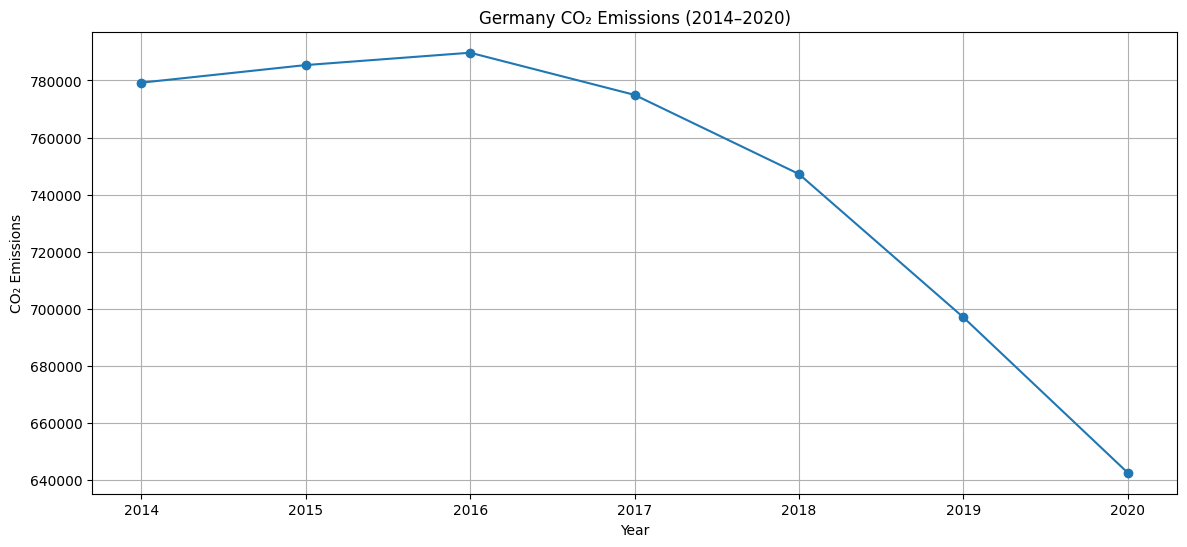

In [13]:
# Plotting specific period
germany_2014 = germany_long[(germany_long['year'] >= 2014) & (germany_long['year'] <= 2020)]
plt.figure(figsize=(14, 6))
plt.plot(germany_2014['year'], germany_2014['value'], marker='o')

plt.title('Germany CO₂ Emissions (2014–2020)')
plt.xlabel('Year')
plt.ylabel('CO₂ Emissions')
plt.grid(True)
plt.show()

Investments in renewable infrastructure increased, energy efficiency measures were implemented more broadly, and public awareness around climate change continued to grow. These factors contributed to a gradual but noticeable reduction in the country’s overall carbon footprint. 

The decline also reflects advancements in technology and policy reforms aimed at reducing reliance on coal and gas. Although the initial post-nuclear phase-out period saw emissions rise due to fossil fuel substitution, the years following 2014 suggest a turning point where Germany began to recover its climate trajectory and make meaningful progress toward sustainability and decarbonization.

### The Impact of the Global Financial Crisis: A Sharp Decline in 2008

The noticeable drop in CO₂ emissions in Germany around 2008 is most likely linked to the global financial crisis that began in late 2007 and escalated in 2008

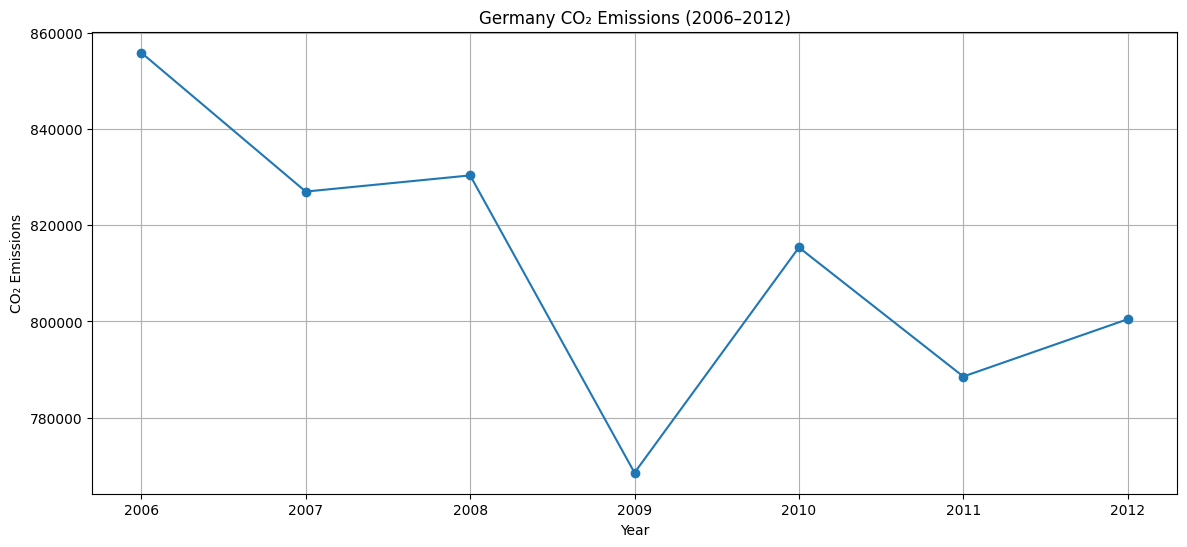

In [14]:
# Plotting specific period
germany_2008 = germany_long[(germany_long['year'] >= 2006) & (germany_long['year'] <= 2012)]
plt.figure(figsize=(14, 6))
plt.plot(germany_2008['year'], germany_2008['value'], marker='o')

plt.title('Germany CO₂ Emissions (2006–2012)')
plt.xlabel('Year')
plt.ylabel('CO₂ Emissions')
plt.grid(True)
plt.show()

Economic slowdown: Industrial activity, manufacturing, and energy consumption dropped significantly as demand fell globally.

Factories operated at reduced capacity, transport decreased, and overall energy demand was lower.
CO₂ emissions are tightly coupled with economic activity – especially in sectors like manufacturing, construction, and energy.
Many countries, not just Germany, saw temporary reductions in emissions during that period.